<a href="https://colab.research.google.com/github/DCM2002/ML_CW_2410214/blob/main/ML_CW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, f_oneway
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE



In [ ]:
# Input dataset CSV file
input_file = "/content/bank-additional-full.csv"

# Read and process the CSV file with semicolon-delimited rows
with open(input_file, mode="r", newline="", encoding="utf-8") as file:
    reader = csv.reader(file, delimiter=';')  # Use semicolon as the delimiter

    # Read the header and process it
    header = next(reader, None)
    if header:
        print("Header:", header)

    # Split each row into columns and print
    for row in reader:
        print(row)

# Save processed rows to a new CSV file
output_file = "new-bank-additional-full.csv"

with open(input_file, mode="r", newline="", encoding="utf-8") as infile, \
     open(output_file, mode="w", newline="", encoding="utf-8") as outfile:

    reader = csv.reader(infile, delimiter=';')  # Input is semicolon-delimited
    writer = csv.writer(outfile)  # Output will be comma-delimited

    for row in reader:
        writer.writerow(row)  # Write each processed row to the output CSV file

print(f"Data has been processed and written to {output_file}")

In [ ]:
# Load the dataset
data = pd.read_csv('/content/new-bank-additional-full.csv')

# Display the first few rows of the dataset
print(data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
#Display the count of "unknown" values for each feature
unknown_counts = data.apply(lambda x: (x == 'unknown').sum() if x.dtype == 'object' else 0)
print("Count of 'unknown' values for each feature:\n", unknown_counts)

#Replace null values with "unknown"
data.fillna('unknown', inplace=True)


Count of 'unknown' values for each feature:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
Duplicate rows:
        age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  profess

## **Age feature analysis**

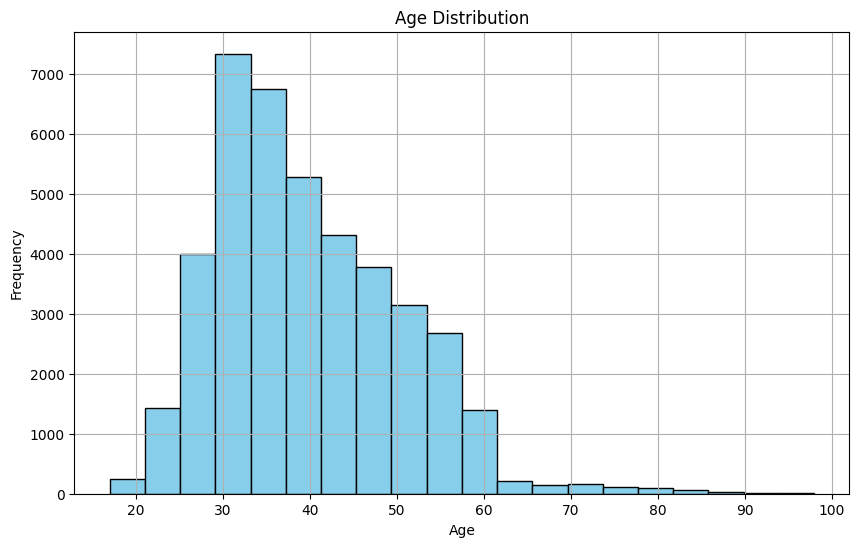

<ipython-input-5-66ca8b6b5e4a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='poutcome', y='age', palette=palette)


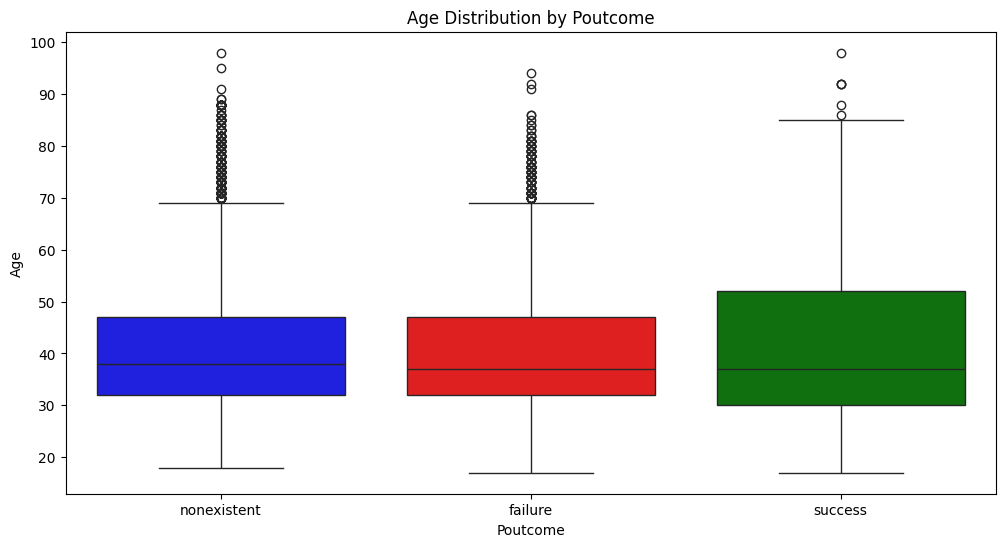

In [ ]:
# Plot Age histogram
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

# Define a color palette for the poutcome categories - after fixing outlier
palette = {'failure': 'red', 'nonexistent': 'blue', 'success': 'green'}

# Plot box plot of age distribution by poutcome- before fixing outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='poutcome', y='age', palette=palette)
plt.title('Age Distribution by Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Age')
plt.show()


In [ ]:
data['age'].value_counts()

,count
age,
31,1947
32,1845
33,1833
36,1779
35,1758
...,...
89,2
91,2
94,1


In [ ]:
data.loc[data['age'] >=60]['age'].value_counts()

,count
age,
60,283
61,73
62,62
66,57
64,57
63,55
71,52
70,47
65,44


In [ ]:
# Calculate average age for 86-94
age_avg = data[(data['age'] >= 86) & (data['age'] <= 94)]['age'].mean()

# Make it whole number
age_avg = round(age_avg)
print(age_avg)

# Fill ages between 82-90 with average age
data.loc[(data['age'] >= 86) & (data['age'] <= 94), 'age'] = age_avg

88


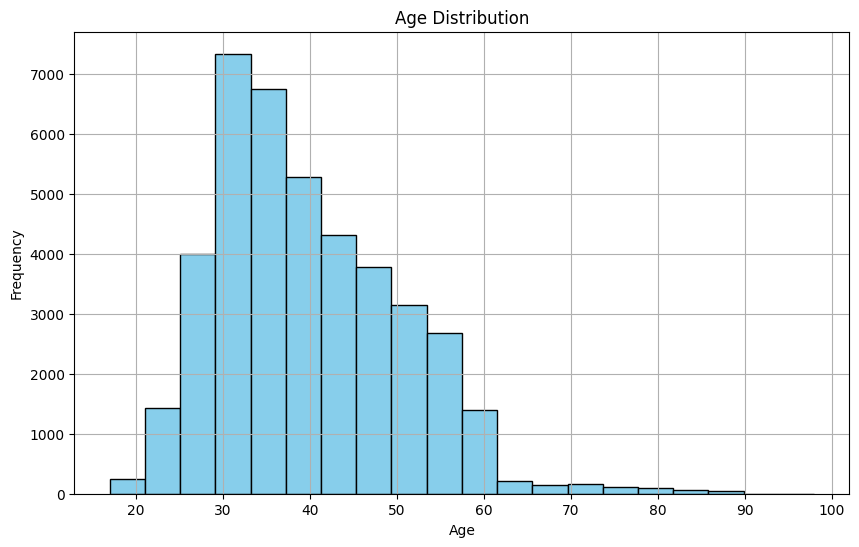

<ipython-input-9-c4dc8526c5fc>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='poutcome', y='age', palette=palette)


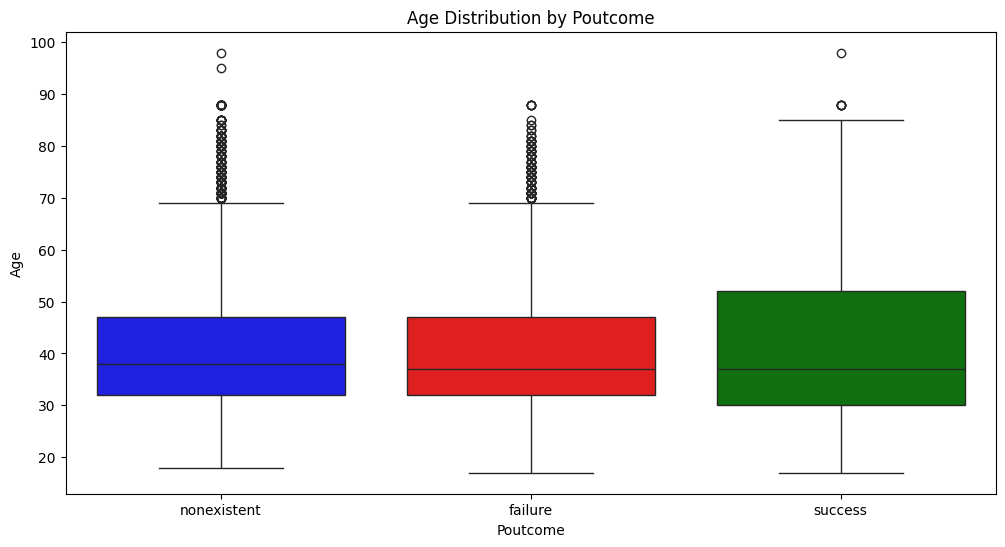

In [ ]:
#Age histogram after handling outlier
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

# Define a color palette for the poutcome categories - after fixing outlier
palette = {'failure': 'red', 'nonexistent': 'blue', 'success': 'green'}

# Plot box plot of age distribution by poutcome
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='poutcome', y='age', palette=palette)
plt.title('Age Distribution by Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Age')
plt.show()

## **Age Feature- Cat.Feature co-relation**

job (ANOVA): F-statistic = 1279.6087703059343, p-value = 0.0, Significance = Highly significant
marital (ANOVA): F-statistic = 2922.5880337270705, p-value = 0.0, Significance = Highly significant
education (ANOVA): F-statistic = 457.5893153469064, p-value = 0.0, Significance = Highly significant
default (ANOVA): F-statistic = 576.580105906483, p-value = 1.0888073248193092e-247, Significance = Highly significant
housing (ANOVA): F-statistic = 0.0656691891702625, p-value = 0.936440695833066, Significance = Not significant
loan (ANOVA): F-statistic = 1.132536032366587, p-value = 0.3222251090842227, Significance = Not significant


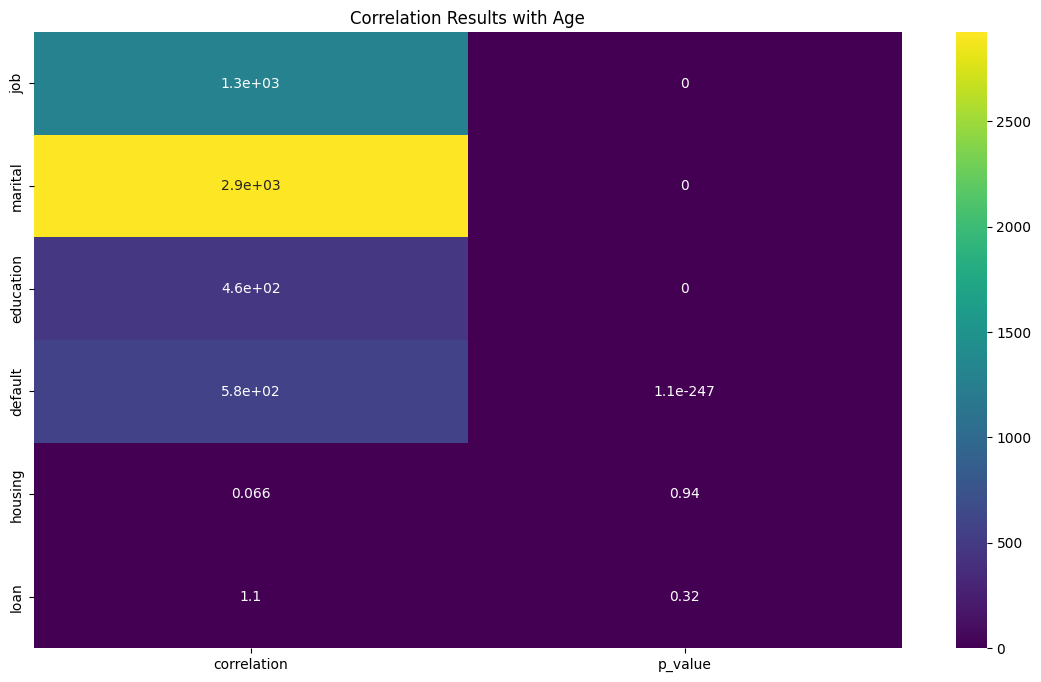

Significance Levels:
     Feature        Significance
0        job  Highly significant
1    marital  Highly significant
2  education  Highly significant
3    default  Highly significant
4    housing     Not significant
5       loan     Not significant


In [ ]:
# List of categorical features to analyze
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Dictionary to store the correlation results
correlation_results = {}

# Function to calculate Point-Biserial Correlation for binary categorical variables
def calculate_point_biserial(feature):
    binary_feature = data[feature].apply(lambda x: 1 if x == 'yes' else 0)
    corr, p_value = pointbiserialr(binary_feature, data['age'])
    return corr, p_value

# Function to calculate ANOVA for multi-class categorical variables
def calculate_anova(feature):
    categories = data[feature].unique()
    groups = [data[data[feature] == category]['age'] for category in categories]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

# Function to categorize p-value significance
def categorize_p_value(p_value):
    if p_value < 0.01:
        return 'Highly significant'
    elif p_value < 0.05:
        return 'Significant'
    elif p_value < 0.10:
        return 'Marginally significant'
    else:
        return 'Not significant'

# Calculate correlations for each categorical feature
for feature in categorical_features:
    if data[feature].nunique() == 2:  # Binary categorical variable
        corr, p_value = calculate_point_biserial(feature)
        significance = categorize_p_value(p_value)
        correlation_results[feature] = {'correlation': corr, 'p_value': p_value, 'significance': significance}
    else:  # Multi-class categorical variable
        f_stat, p_value = calculate_anova(feature)
        significance = categorize_p_value(p_value)
        correlation_results[feature] = {'F-statistic': f_stat, 'p_value': p_value, 'significance': significance}

# Print the correlation results
for feature, results in correlation_results.items():
    if 'correlation' in results:
        print(f"{feature} (Point-Biserial Correlation): Correlation = {results['correlation']}, p-value = {results['p_value']}, Significance = {results['significance']}")
    else:
        print(f"{feature} (ANOVA): F-statistic = {results['F-statistic']}, p-value = {results['p_value']}, Significance = {results['significance']}")

# Separate the numerical values and significance levels
numerical_results = {feature: {'correlation': results.get('correlation', results.get('F-statistic', None)), 'p_value': results['p_value']} for feature, results in correlation_results.items()}
significance_results = {feature: results['significance'] for feature, results in correlation_results.items()}

# Convert to DataFrames
numerical_df = pd.DataFrame(numerical_results).T
significance_df = pd.DataFrame(list(significance_results.items()), columns=['Feature', 'Significance'])

# Visualize the numerical results
plt.figure(figsize=(14, 8))
sns.heatmap(numerical_df, annot=True, cmap='viridis')
plt.title('Correlation Results with Age')
plt.show()

# Print the significance results
print("Significance Levels:")
print(significance_df)


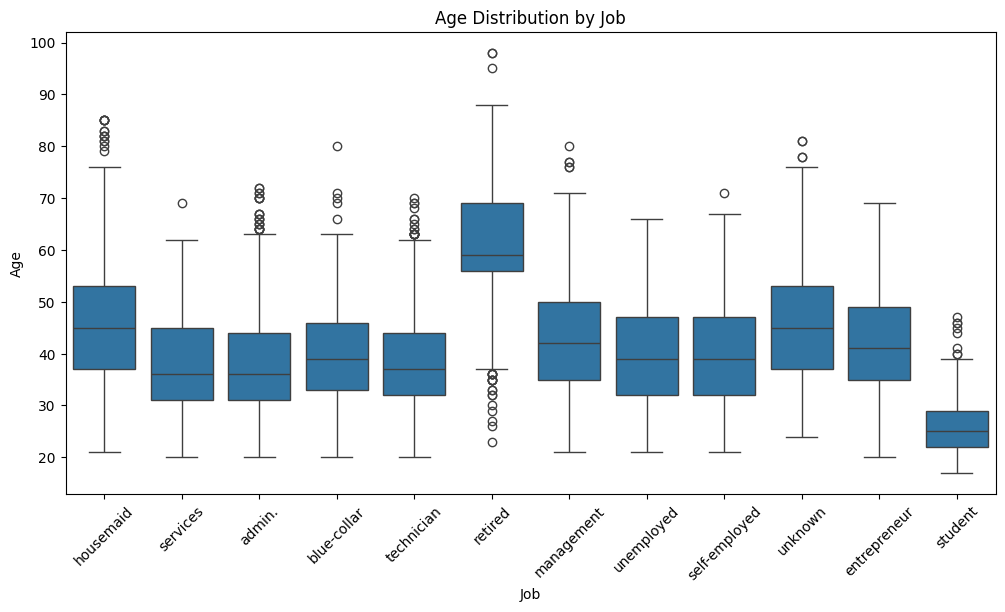

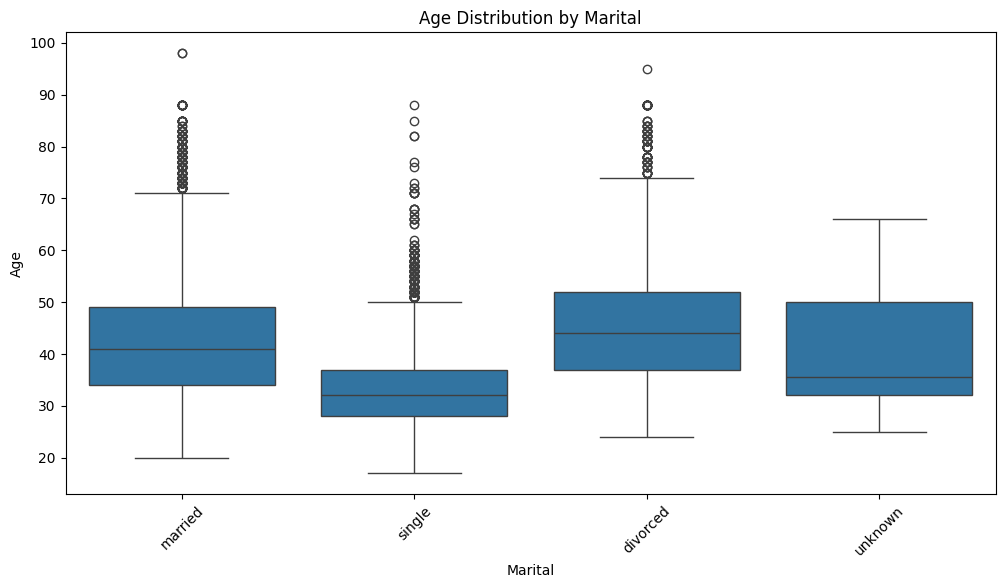

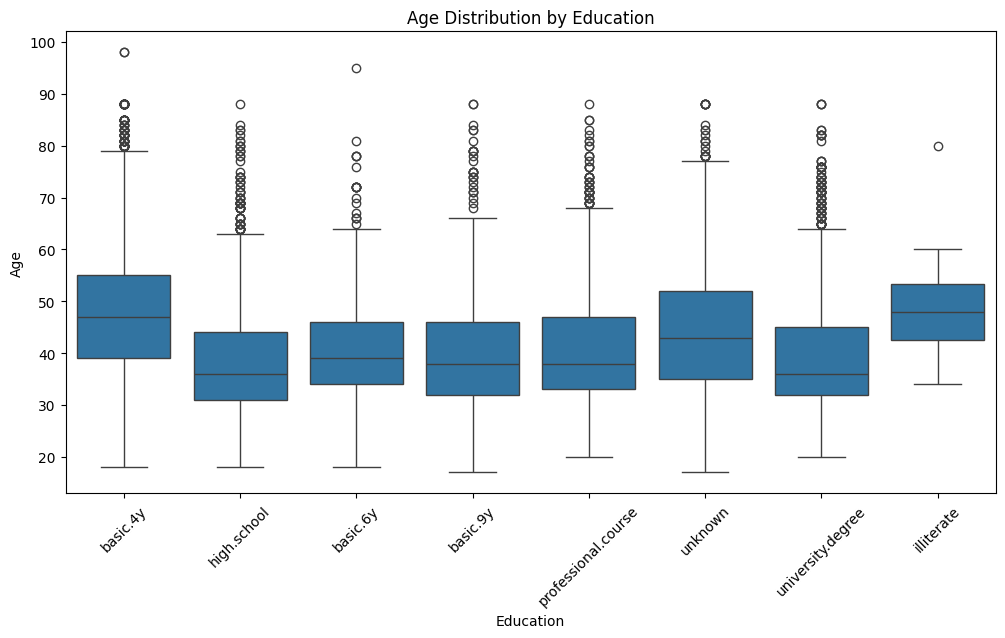

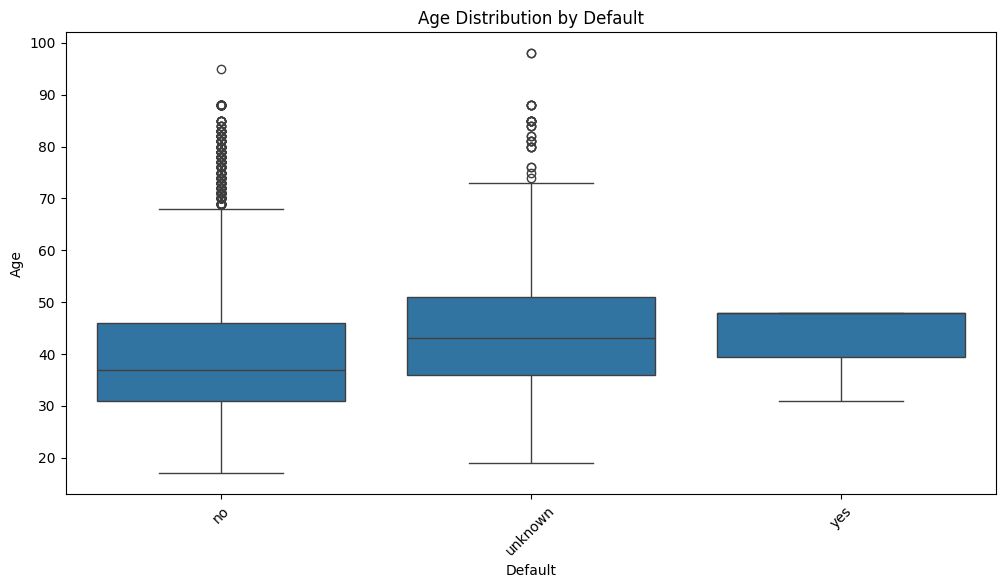

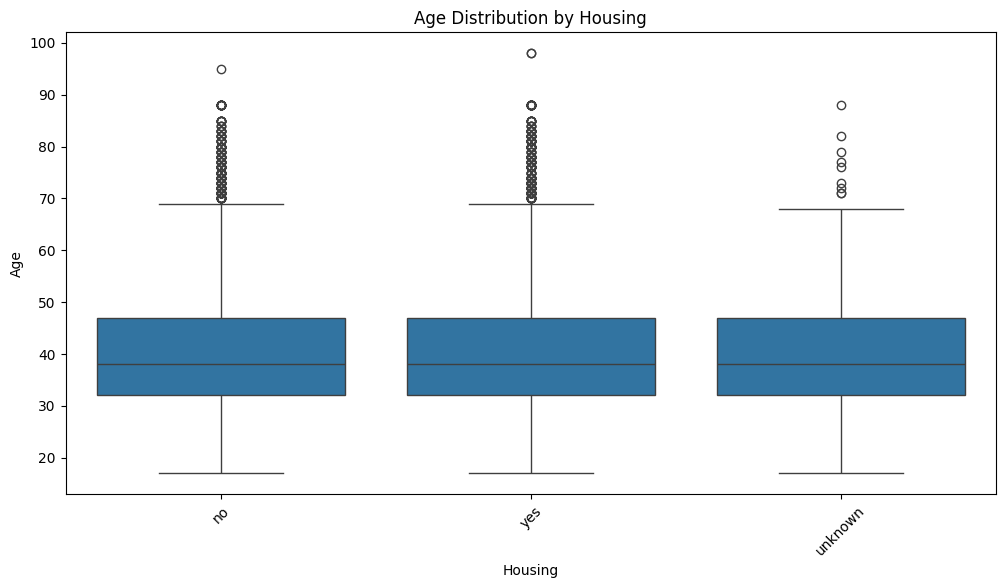

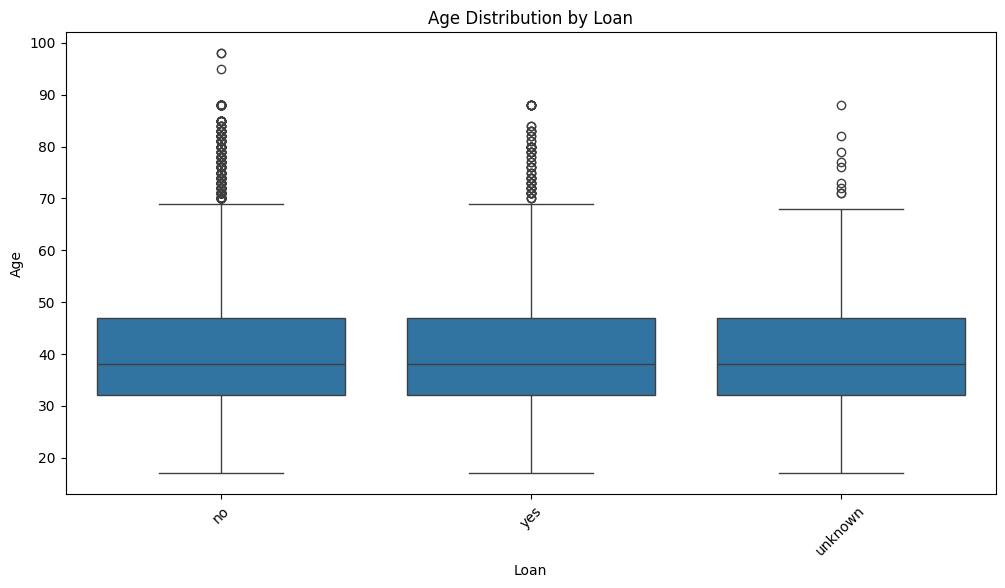

In [ ]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default','housing','loan']

# Plot box plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=feature, y='age')
    plt.title(f'Age Distribution by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Age')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Define age bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Classify age into bins
data['age_bin'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

<ipython-input-13-02e14bda226d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_frequent_job = data.groupby('age_bin')['job'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')


Most frequent job category for each age bin:
 age_bin
0-20          student
21-30          admin.
31-40          admin.
41-50     blue-collar
51-60     blue-collar
61-70         retired
71-80         retired
81-90         retired
91-100        retired
Name: job, dtype: object
Job distribution after replacement:
 job
admin.           10517
blue-collar       9456
technician        6739
services          3967
management        2924
retired           1747
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64


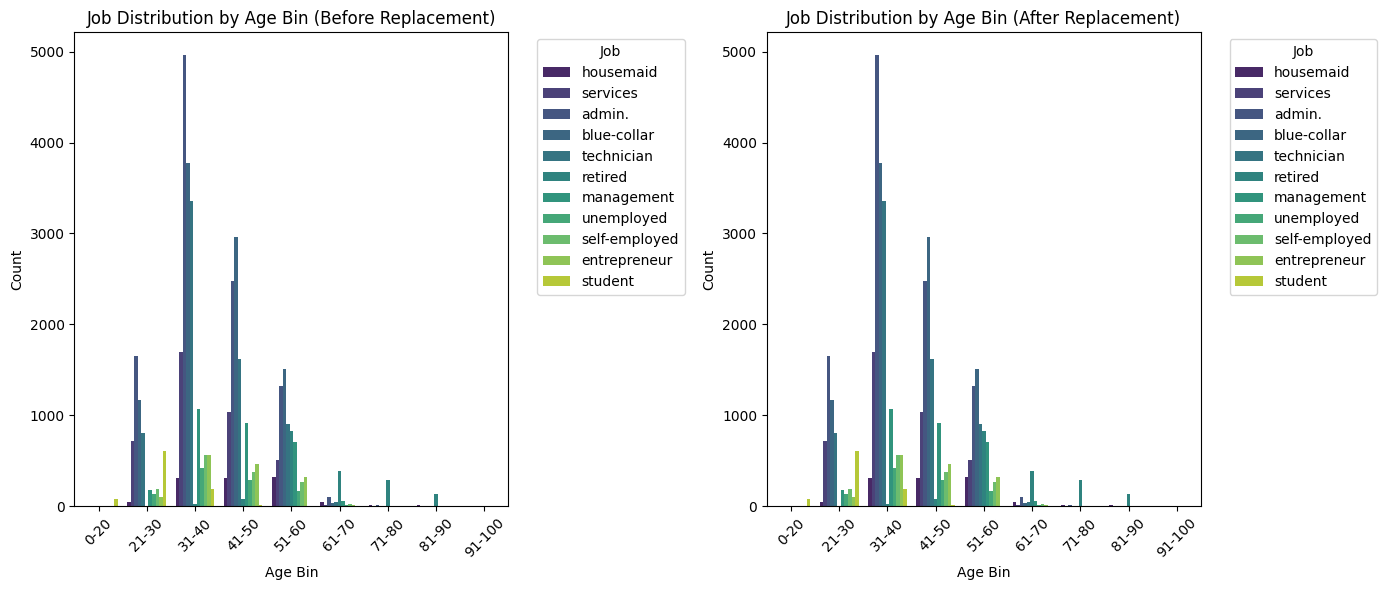

In [ ]:
#Job-Age


# Determine the most frequent job category for each age bin
most_frequent_job = data.groupby('age_bin')['job'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# Print the most frequent job category for each age bin
print("Most frequent job category for each age bin:\n", most_frequent_job)

# Function to replace 'unknown' labels based on age bin
def replace_unknown_job(row):
    if row['job'] == 'unknown':
        return most_frequent_job[row['age_bin']]
    return row['job']

# Replace 'unknown' labels in 'job'
data['job'] = data.apply(replace_unknown_job, axis=1)

# Verify the changes
print("Job distribution after replacement:\n", data['job'].value_counts())

# Visualize the job distribution before and after replacement
plt.figure(figsize=(14, 6))

# Before replacement
plt.subplot(1, 2, 1)
sns.countplot(data=data[data['job'] != 'unknown'], x='age_bin', hue='job', palette='viridis')
plt.title('Job Distribution by Age Bin (Before Replacement)')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job', bbox_to_anchor=(1.05, 1), loc='upper left')

# After replacement
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='age_bin', hue='job', palette='viridis')
plt.title('Job Distribution by Age Bin (After Replacement)')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<ipython-input-14-4eb287fa37ee>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_frequent_default = data.groupby('age_bin')['default'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')


Most frequent answer for each age bin:
 age_bin
0-20           no
21-30          no
31-40          no
41-50          no
51-60          no
61-70          no
71-80          no
81-90          no
91-100    unknown
Name: default, dtype: object
Default distribution after replacement:
 default
no         41171
yes            3
unknown        2
Name: count, dtype: int64


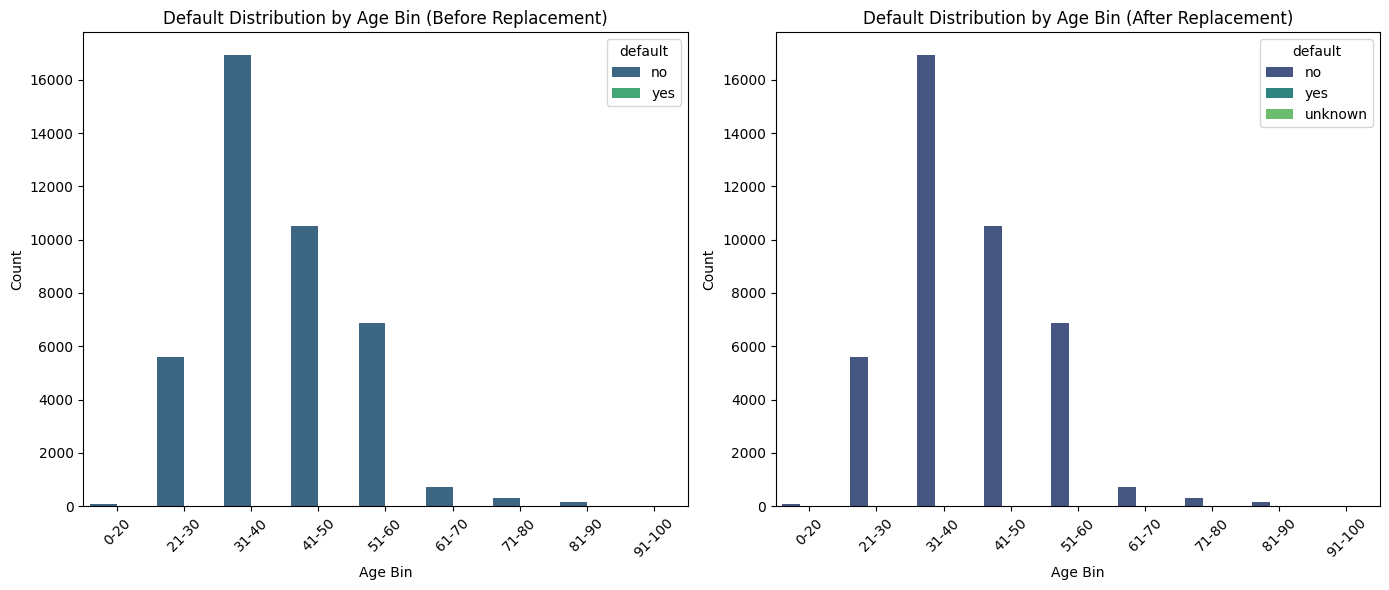

In [ ]:
#Default-Age



# Determine the most frequent answer for each age bin
most_frequent_default = data.groupby('age_bin')['default'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# Print the most frequent answer for each age bin
print("Most frequent answer for each age bin:\n", most_frequent_default)

# Function to replace 'unknown' labels based on age bin
def replace_unknown_default(row):
    if row['default'] == 'unknown':
        return most_frequent_default[row['age_bin']]
    return row['default']

# Replace 'unknown' labels in 'default'
data['default'] = data.apply(replace_unknown_default, axis=1)

# Verify the changes
print("Default distribution after replacement:\n", data['default'].value_counts())

# Visualize the default distribution before and after replacement
plt.figure(figsize=(14, 6))

# Before replacement
plt.subplot(1, 2, 1)
sns.countplot(data=data[data['default'] != 'unknown'], x='age_bin', hue='default', palette='viridis')
plt.title('Default Distribution by Age Bin (Before Replacement)')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)

# After replacement
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='age_bin', hue='default', palette='viridis')
plt.title('Default Distribution by Age Bin (After Replacement)')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


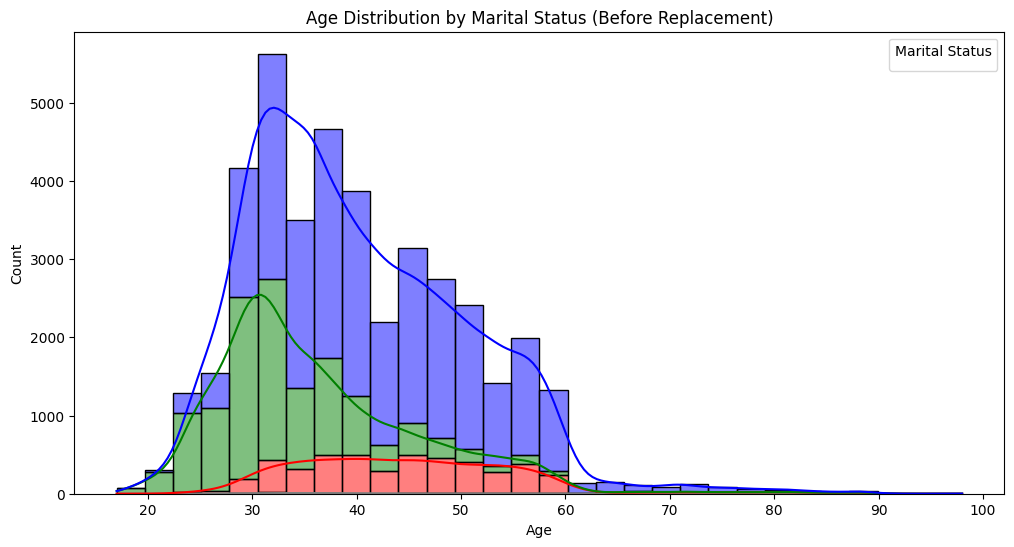

Average age for different marital statuses:
 {'divorced': 44.89872045109521, 'married': 42.306849644877815, 'single': 33.15703908682117}
Count of 'unknown' values in 'marital' after replacement: 0
Marital status distribution after replacement:
 marital
married     24941
single      11594
divorced     4641
Name: count, dtype: int64


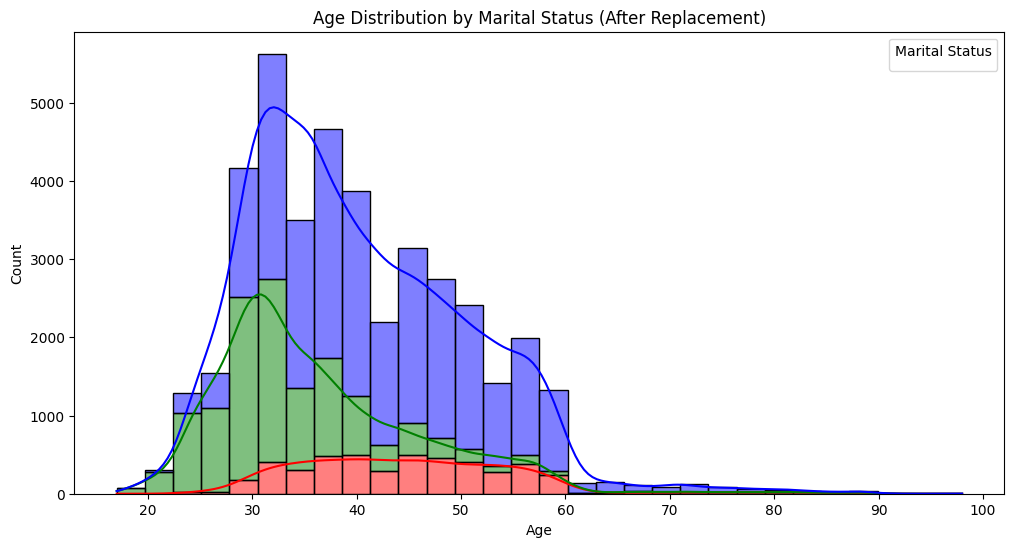

In [ ]:
#Marital-Age

# Define a color palette for the marital statuses
palette = {'married': 'blue', 'single': 'green', 'divorced': 'red', 'unknown': 'gray'}

# Plot histogram of age distribution by marital status before replacement
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='marital', multiple='stack', bins=30, kde=True, palette=palette)
plt.title('Age Distribution by Marital Status (Before Replacement)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

# Determine the age ranges for different marital statuses
age_ranges = {
    'divorced': data[data['marital'] == 'divorced']['age'].mean(),
    'married': data[data['marital'] == 'married']['age'].mean(),
    'single': data[data['marital'] == 'single']['age'].mean()
}

print("Average age for different marital statuses:\n", age_ranges)

# Replace 'unknown' labels in 'marital' based on age ranges
def replace_unknown_marital(row):
    if row['marital'] == 'unknown':
        if row['age'] < age_ranges['single']:
            return 'single'
        elif row['age'] < age_ranges['married']:
            return 'married'
        else:
            return 'divorced'
    return row['marital']

data['marital'] = data.apply(replace_unknown_marital, axis=1)

# Check the count of 'unknown' values after replacement
unknown_counts_after = data['marital'].value_counts().get('unknown', 0)
print("Count of 'unknown' values in 'marital' after replacement:", unknown_counts_after)

# Verify the changes
print("Marital status distribution after replacement:\n", data['marital'].value_counts())

# Plot histogram of age distribution by marital status after replacement
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='marital', multiple='stack', bins=30, kde=True, palette=palette)
plt.title('Age Distribution by Marital Status (After Replacement)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()


<ipython-input-16-078f6531f733>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_frequent_education = data.groupby('age_bin')['education'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')


Most frequent education category for each age bin:
 age_bin
0-20                unknown
21-30           high.school
31-40     university.degree
41-50     university.degree
51-60     university.degree
61-70     university.degree
71-80              basic.4y
81-90              basic.4y
91-100             basic.4y
Name: education, dtype: object
Education distribution after replacement:
 education
university.degree      13610
high.school             9716
basic.9y                6045
professional.course     5240
basic.4y                4224
basic.6y                2291
unknown                   32
illiterate                18
Name: count, dtype: int64


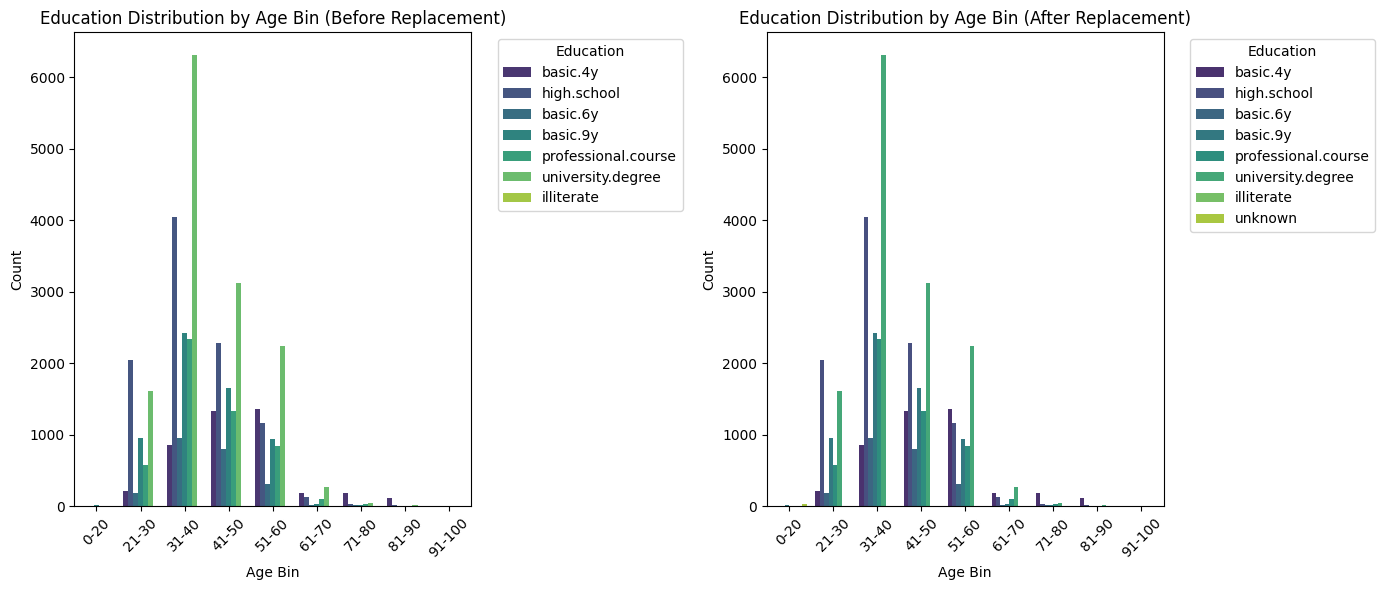

In [ ]:
#Education-Age

# Determine the most frequent education category for each age bin
most_frequent_education = data.groupby('age_bin')['education'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# Print the most frequent education category for each age bin
print("Most frequent education category for each age bin:\n", most_frequent_education)

# Function to replace 'unknown' labels based on age bin
def replace_unknown_education(row):
    if row['education'] == 'unknown':
        return most_frequent_education[row['age_bin']]
    return row['education']

# Replace 'unknown' labels in 'education'
data['education'] = data.apply(replace_unknown_education, axis=1)

# Verify the changes
print("Education distribution after replacement:\n", data['education'].value_counts())

# Visualize the education distribution before and after replacement
plt.figure(figsize=(14, 6))

# Before replacement
plt.subplot(1, 2, 1)
sns.countplot(data=data[data['education'] != 'unknown'], x='age_bin', hue='education', palette='viridis')
plt.title('Education Distribution by Age Bin (Before Replacement)')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')

# After replacement
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='age_bin', hue='education', palette='viridis')
plt.title('Education Distribution by Age Bin (After Replacement)')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Correlation results for 'housing':
job: Chi2 = 31.223073757800627, p-value = 0.05231354877981689, Cramer's V = 0.02753694453817911
marital: Chi2 = 9.496754771248055, p-value = 0.04981397237905008, Cramer's V = 0.015186774143317127
education: Chi2 = 30.51016899853987, p-value = 0.006487569418409325, Cramer's V = 0.027220758904422833
default: Chi2 = 2.4033356806281394, p-value = 0.6620245375571276, Cramer's V = 0.007639855412787058
contact: Chi2 = 296.110106663012, p-value = 5.017730365831022e-65, Cramer's V = 0.08480169593900716
month: Chi2 = 260.40103280768693, p-value = 6.21335729691187e-45, Cramer's V = 0.07952419353800938
day_of_week: Chi2 = 25.852049359273085, p-value = 0.0011133004354017383, Cramer's V = 0.025056788696562304
poutcome: Chi2 = 27.627356687635015, p-value = 1.484084505486096e-05, Cramer's V = 0.025902852334715898

Correlation results for 'loan':
job: Chi2 = 28.954114371647552, p-value = 0.08866679594802249, Cramer's V = 0.026517529774878333
marital: Chi2 = 3.05404178

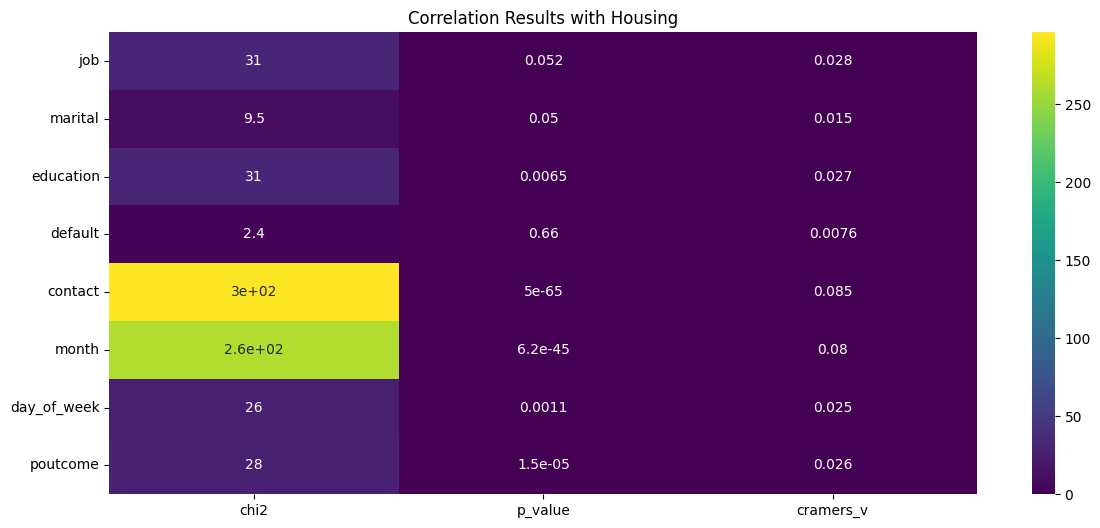

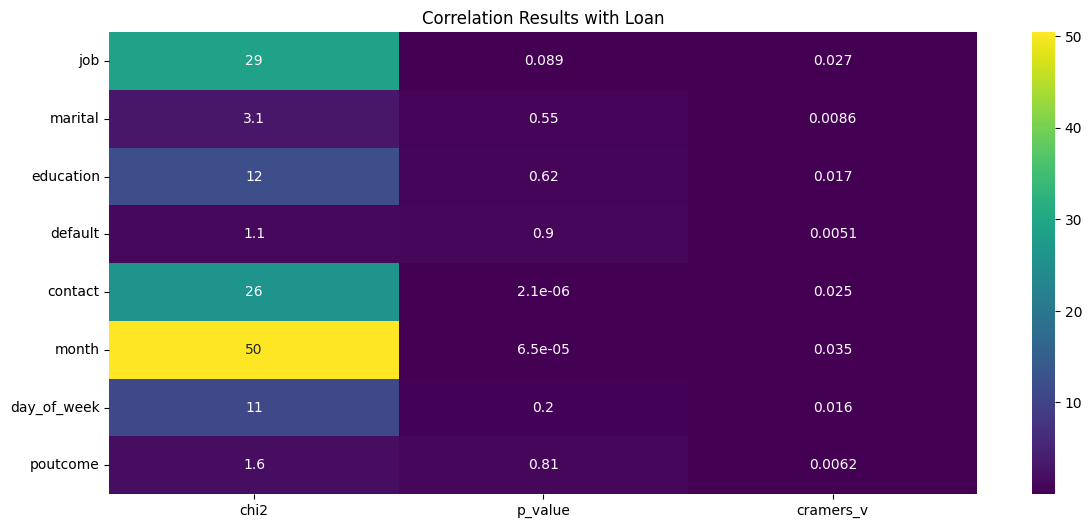

In [ ]:
#Best co-relation for Housing and Loan feature

# List of categorical features to analyze
categorical_features = ['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome']

# Function to calculate Chi-Square and Cramer's V for correlation
def calculate_chi2_cramers_v(feature1, feature2):
    contingency_table = pd.crosstab(data[feature1], data[feature2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = (chi2 / n) ** 0.5
    return chi2, p, cramers_v

# Dictionary to store the correlation results
correlation_results_housing = {}
correlation_results_loan = {}

# Calculate correlations for 'housing'
for feature in categorical_features:
    chi2, p, cramers_v = calculate_chi2_cramers_v('housing', feature)
    correlation_results_housing[feature] = {'chi2': chi2, 'p_value': p, 'cramers_v': cramers_v}

# Calculate correlations for 'loan'
for feature in categorical_features:
    chi2, p, cramers_v = calculate_chi2_cramers_v('loan', feature)
    correlation_results_loan[feature] = {'chi2': chi2, 'p_value': p, 'cramers_v': cramers_v}

# Print the correlation results for 'housing'
print("Correlation results for 'housing':")
for feature, results in correlation_results_housing.items():
    print(f"{feature}: Chi2 = {results['chi2']}, p-value = {results['p_value']}, Cramer's V = {results['cramers_v']}")

# Print the correlation results for 'loan'
print("\nCorrelation results for 'loan':")
for feature, results in correlation_results_loan.items():
    print(f"{feature}: Chi2 = {results['chi2']}, p-value = {results['p_value']}, Cramer's V = {results['cramers_v']}")

# Identify the best correlating feature for 'housing'
best_feature_housing = max(correlation_results_housing, key=lambda k: correlation_results_housing[k]['cramers_v'])
print(f"\nBest feature for 'housing': {best_feature_housing} with Cramer's V: {correlation_results_housing[best_feature_housing]['cramers_v']}")

# Identify the best correlating feature for 'loan'
best_feature_loan = max(correlation_results_loan, key=lambda k: correlation_results_loan[k]['cramers_v'])
print(f"Best feature for 'loan': {best_feature_loan} with Cramer's V: {correlation_results_loan[best_feature_loan]['cramers_v']}")

# Visualize the correlations for 'housing'
plt.figure(figsize=(14, 6))
sns.heatmap(pd.DataFrame(correlation_results_housing, index=['chi2', 'p_value', 'cramers_v']).T, annot=True, cmap='viridis')
plt.title('Correlation Results with Housing')
plt.show()

# Visualize the correlations for 'loan'
plt.figure(figsize=(14, 6))
sns.heatmap(pd.DataFrame(correlation_results_loan, index=['chi2', 'p_value', 'cramers_v']).T, annot=True, cmap='viridis')
plt.title('Correlation Results with Loan')
plt.show()


Most frequent answer for 'housing' for each job category:
 job
admin.           yes
blue-collar      yes
entrepreneur     yes
housemaid        yes
management       yes
retired          yes
self-employed    yes
services         yes
student          yes
technician       yes
unemployed       yes
Name: housing, dtype: object
Housing distribution after replacement:
 housing
yes    22561
no     18615
Name: count, dtype: int64


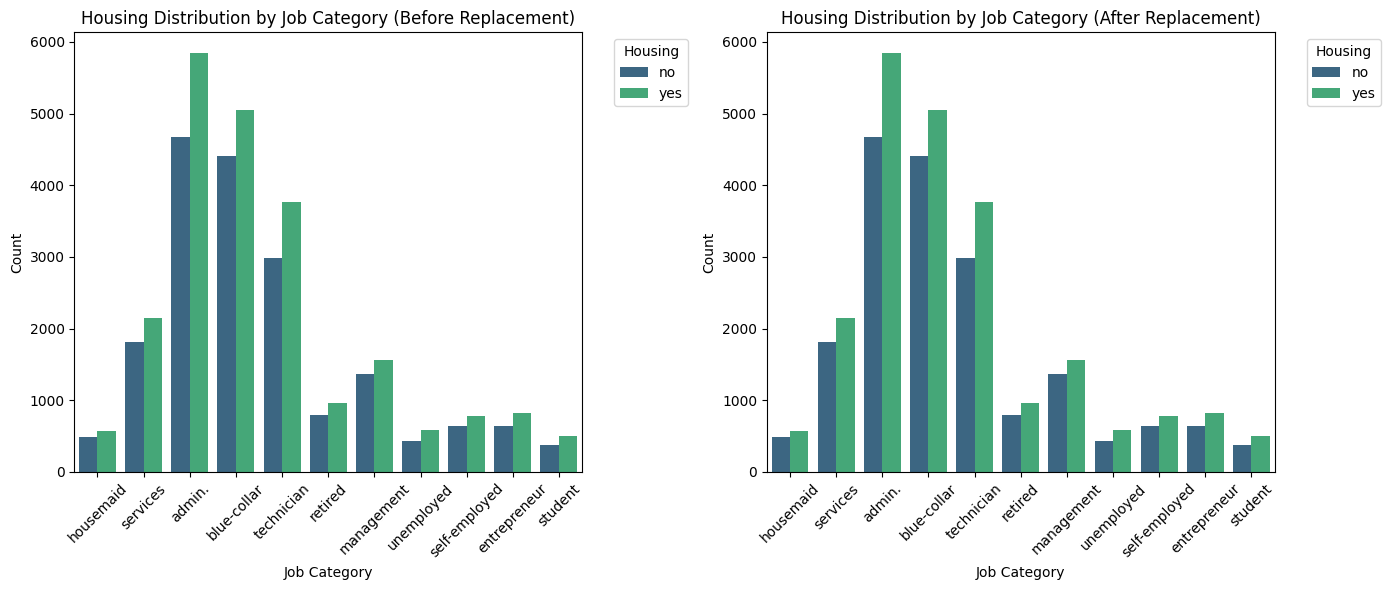

In [ ]:
#Job-Housing

# Determine the most frequent answer for 'housing' for each job category
most_frequent_housing = data.groupby('job')['housing'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# Print the most frequent answer for 'housing' for each job category
print("Most frequent answer for 'housing' for each job category:\n", most_frequent_housing)

# Function to replace 'unknown' labels based on job category
def replace_unknown_housing(row):
    if row['housing'] == 'unknown':
        return most_frequent_housing[row['job']]
    return row['housing']

# Replace 'unknown' labels in 'housing'
data['housing'] = data.apply(replace_unknown_housing, axis=1)

# Verify the changes
print("Housing distribution after replacement:\n", data['housing'].value_counts())

# Visualize the housing distribution before and after replacement
plt.figure(figsize=(14, 6))

# Before replacement
plt.subplot(1, 2, 1)
sns.countplot(data=data[data['housing'] != 'unknown'], x='job', hue='housing', palette='viridis')
plt.title('Housing Distribution by Job Category (Before Replacement)')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Housing', bbox_to_anchor=(1.05, 1), loc='upper left')

# After replacement
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='job', hue='housing', palette='viridis')
plt.title('Housing Distribution by Job Category (After Replacement)')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Housing', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Most frequent answer for 'loan' for each job category:
 job
admin.           no
blue-collar      no
entrepreneur     no
housemaid        no
management       no
retired          no
self-employed    no
services         no
student          no
technician       no
unemployed       no
Name: loan, dtype: object
Loan distribution after replacement:
 loan
no     34928
yes     6248
Name: count, dtype: int64


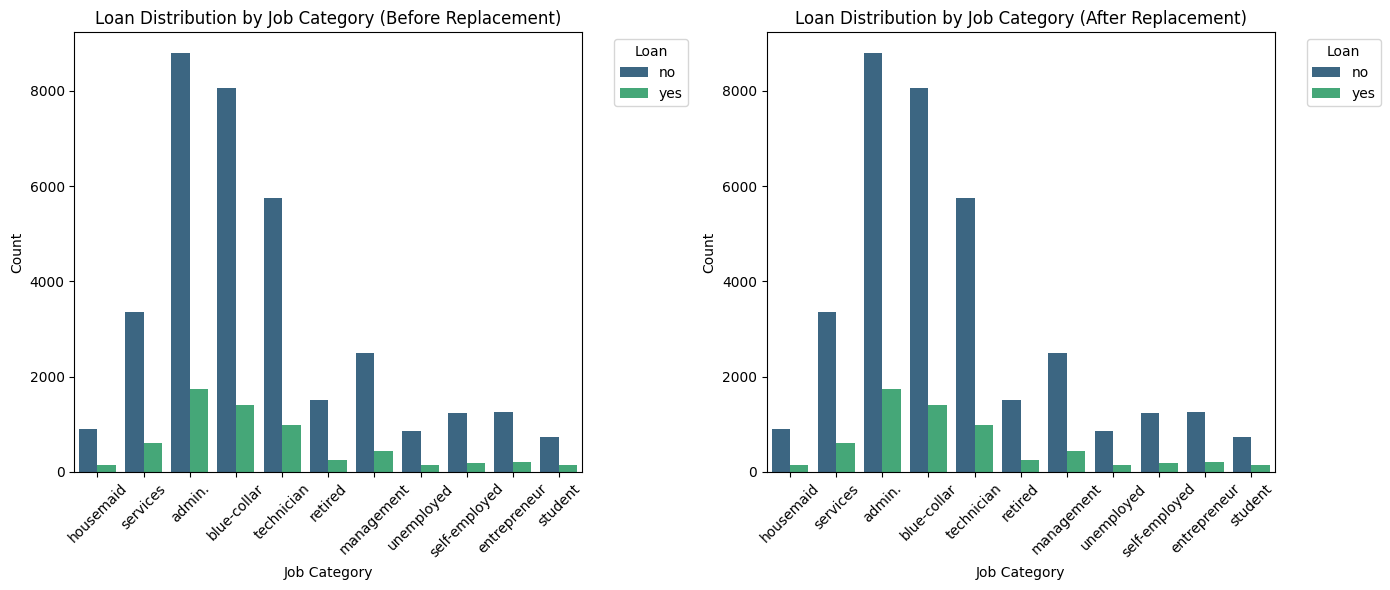

In [ ]:
#Job-Loan

# Determine the most frequent answer for 'loan' for each job category
most_frequent_loan = data.groupby('job')['loan'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

# Print the most frequent answer for 'loan' for each job category
print("Most frequent answer for 'loan' for each job category:\n", most_frequent_loan)

# Function to replace 'unknown' labels based on job category
def replace_unknown_loan(row):
    if row['loan'] == 'unknown':
        return most_frequent_loan[row['job']]
    return row['loan']

# Replace 'unknown' labels in 'loan'
data['loan'] = data.apply(replace_unknown_loan, axis=1)

# Verify the changes
print("Loan distribution after replacement:\n", data['loan'].value_counts())

# Visualize the loan distribution before and after replacement
plt.figure(figsize=(14, 6))

# Before replacement
plt.subplot(1, 2, 1)
sns.countplot(data=data[data['loan'] != 'unknown'], x='job', hue='loan', palette='viridis')
plt.title('Loan Distribution by Job Category (Before Replacement)')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan', bbox_to_anchor=(1.05, 1), loc='upper left')

# After replacement
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='job', hue='loan', palette='viridis')
plt.title('Loan Distribution by Job Category (After Replacement)')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# List of features to check for "unknown" values
features_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Dictionary to store the count of "unknown" values for each feature
unknown_counts = {}

# Check for "unknown" values and count them
for feature in features_to_check:
    unknown_count = data[data[feature] == 'unknown'].shape[0]
    if unknown_count > 0:
        unknown_counts[feature] = unknown_count

# Print the feature names and the count of "unknown" values
if unknown_counts:
    print("Features with 'unknown' values and their counts:")
    for feature, count in unknown_counts.items():
        print(f"{feature}: {count}")
else:
    print("No 'unknown' values found in the specified features.")

# Delete records that have "unknown" values in any of the specified features
data = data[~data[features_to_check].isin(['unknown']).any(axis=1)]

# Verify the changes
print("\nDataFrame after removing records with 'unknown' values:")
print(data.head())
print("\nNumber of rows after removing records with 'unknown' values:", data.shape[0])

Features with 'unknown' values and their counts:
education: 32
default: 2

DataFrame after removing records with 'unknown' values:
   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  pdays  previous     poutcome  emp.var.rate cons.price.idx  \
0         mon  ...    999         0  nonexistent           1.1         93.994   
1         mon  ...    999         0  nonexistent           1.1         93.994   
2         mon  ...    999         0  nonexistent           1.1         93.994   
3         mon  ...    999         0  nonexistent          

In [ ]:
#Check for duplicate rows and handle them
duplicates = data[data.duplicated(keep=False)]
print("Duplicate rows:\n", duplicates)
print("Count of duplicate rows:", duplicates.shape[0])

#Remove duplicates
data = data.drop_duplicates()
print("Final dataset count after removing duplicates:", data.shape[0])

Duplicate rows:
 Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y, age_bin]
Index: []

[0 rows x 22 columns]
Count of duplicate rows: 0
Final dataset count after removing duplicates: 41140


<ipython-input-26-d7a41212fbcb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, y='age', ax=axes[i], palette=palette)
<ipython-input-26-d7a41212fbcb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, y='age', ax=axes[i], palette=palette)
<ipython-input-26-d7a41212fbcb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, y='age', ax=axes[i], palette=palette)
<ipython-input-26-d7a41212fbcb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

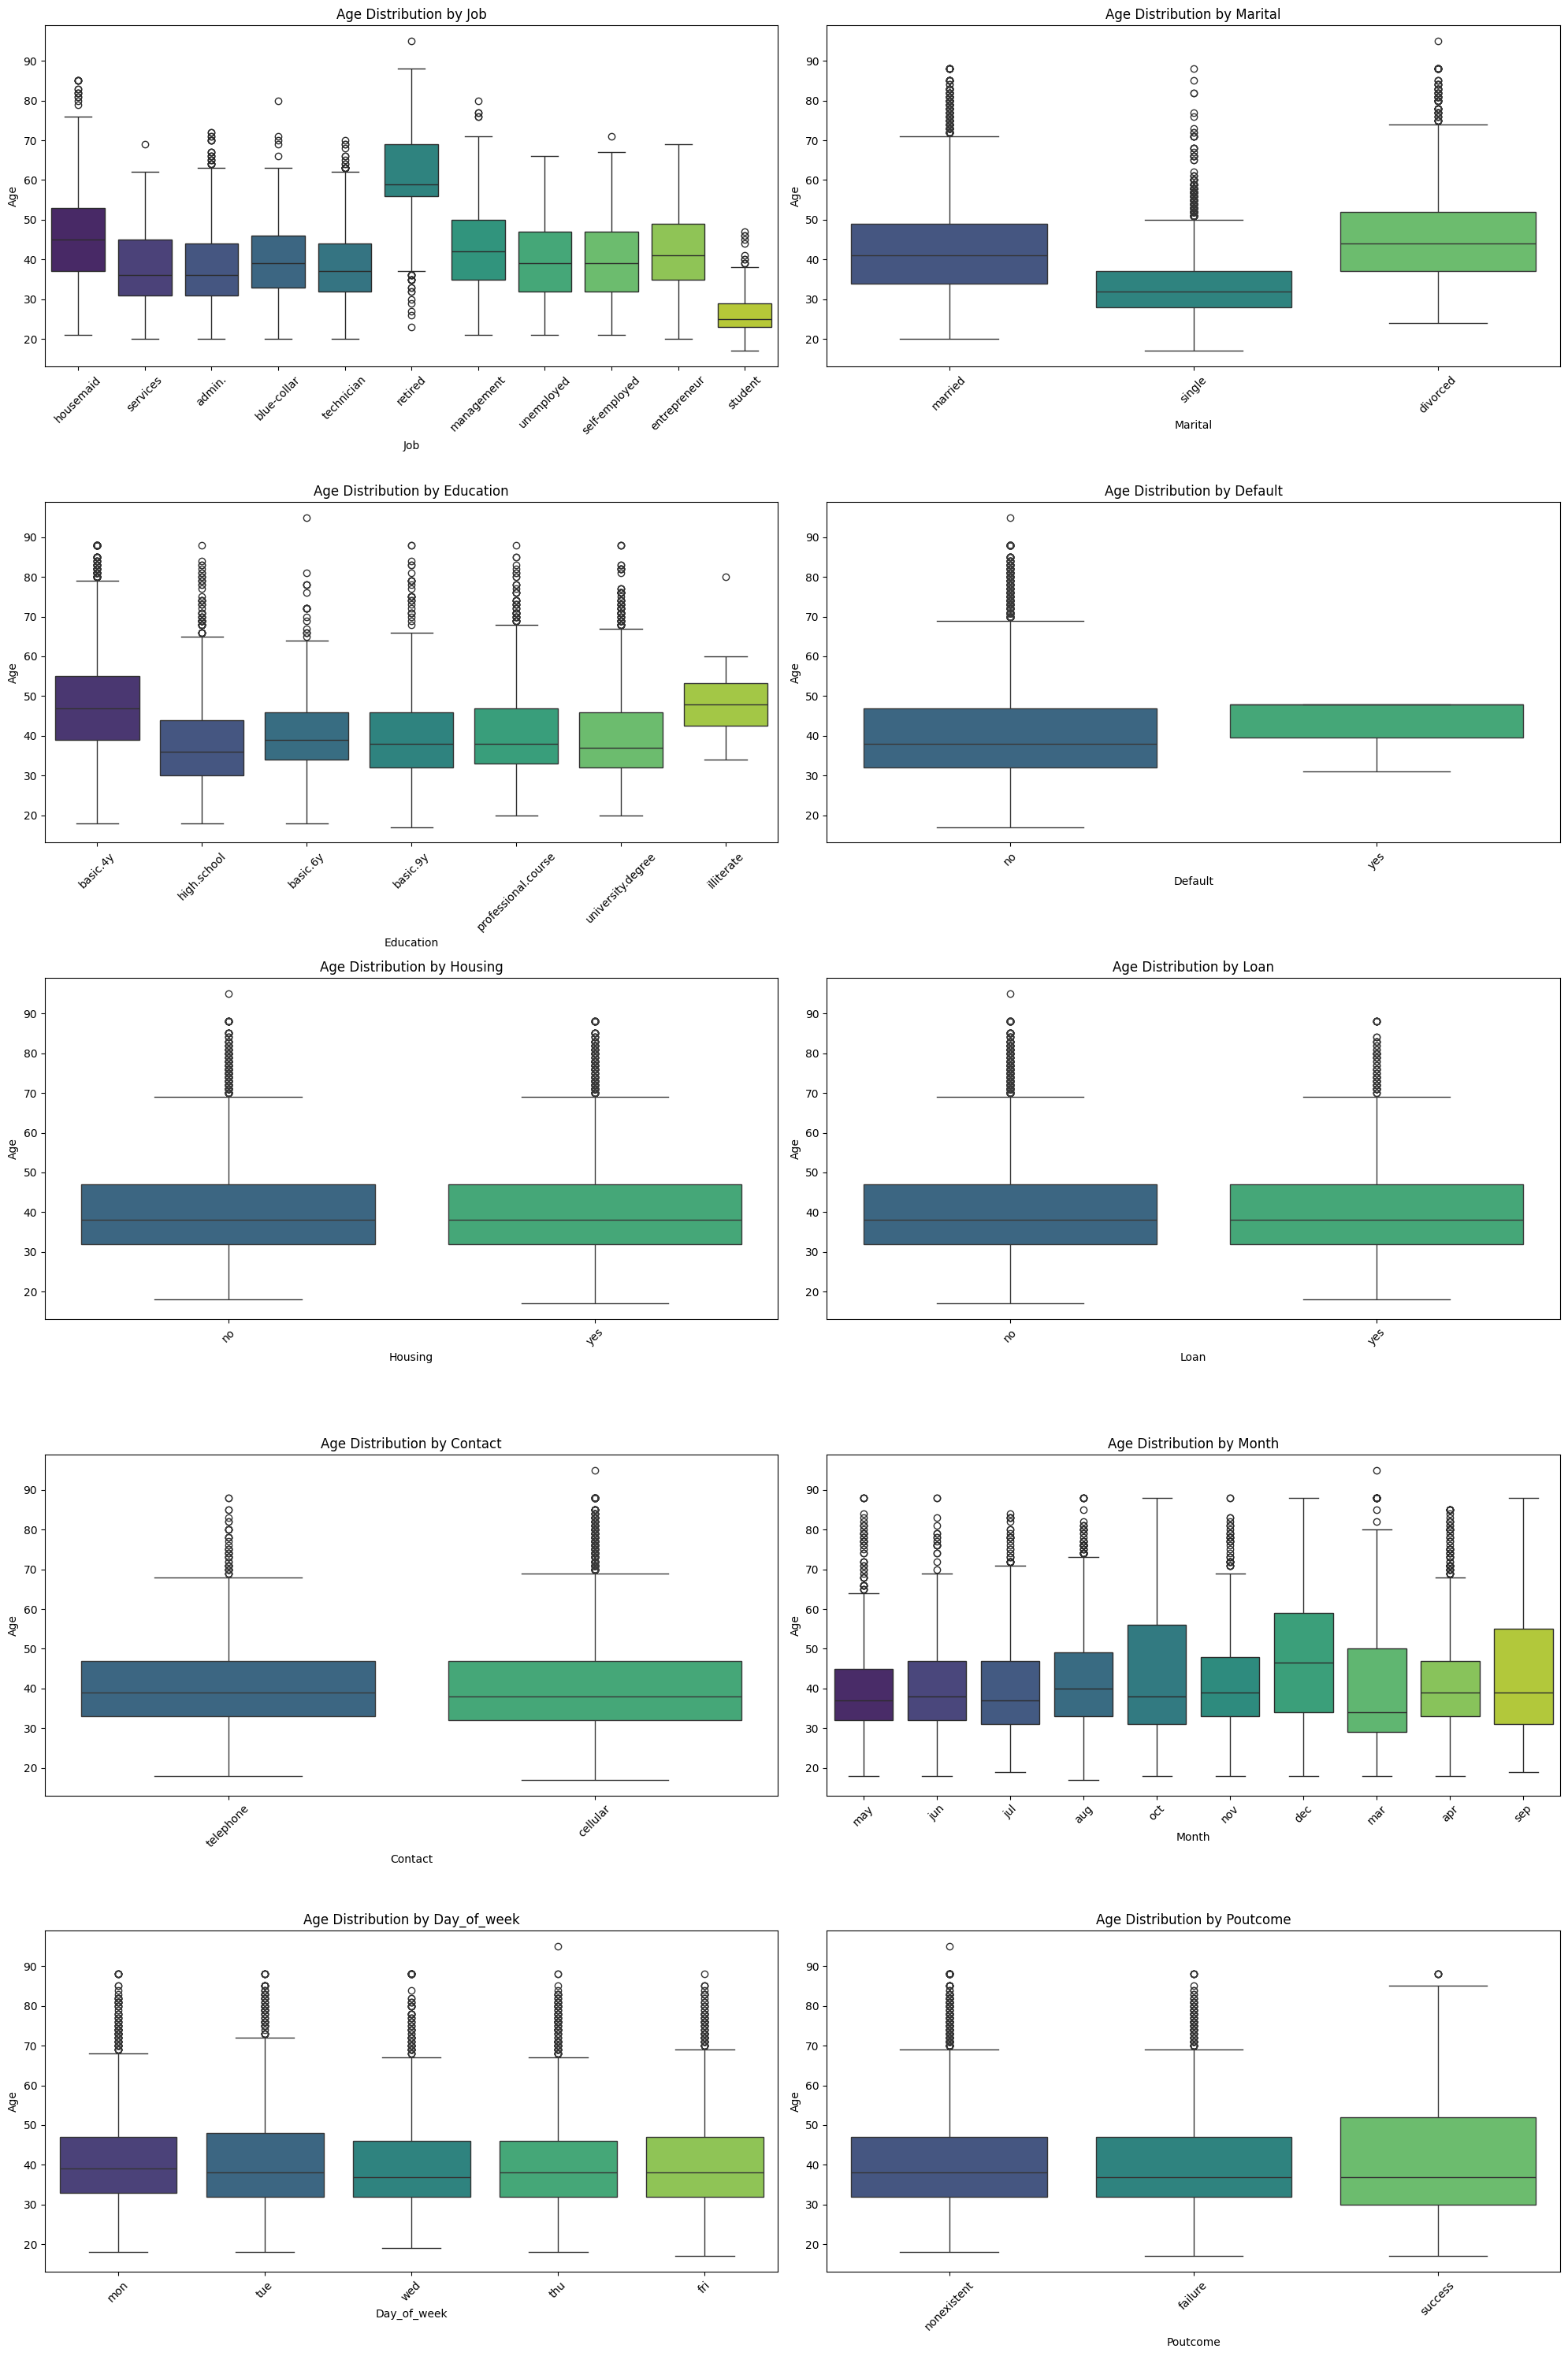

In [ ]:
# List of categorical features to plot
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Define a color palette for the plots
palette = 'viridis'

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
axes = axes.flatten()

# Plot box plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=data, x=feature, y='age', ax=axes[i], palette=palette)
    axes[i].set_title(f'Age Distribution by {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Age')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

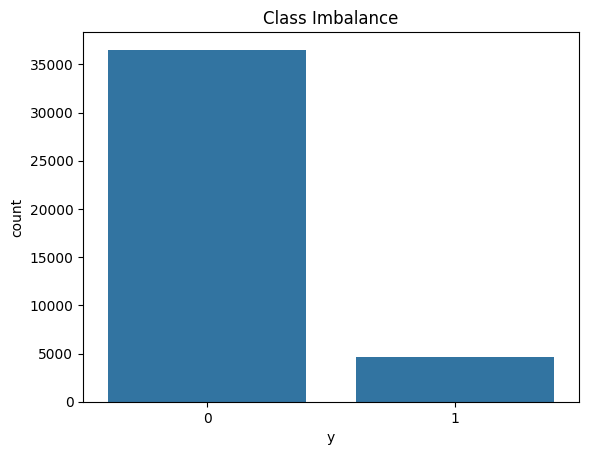

ValueError: could not convert string to float: '41-50'

In [ ]:
# 4. Handle Class Imbalance

# Visualize class imbalance
sns.countplot(x='y', data=data)
plt.title('Class Imbalance')
plt.show()

# Use SMOTE to handle class imbalance
X = data.drop('y', axis=1)
y = data['y']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Visualize class distribution after SMOTE
sns.countplot(x=y_res)
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
#Data Split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X_res' is not defined

In [ ]:
#Random Forest

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

NameError: name 'X_train' is not defined

In [ ]:
#Visual Representation for Random Forest

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Learning Curve for Random Forest
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
#Data

# Convert target labels to categorical
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

In [ ]:
#Neural Network model

# Initialize the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train_nn, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_nn = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn, axis=1)

# Evaluate the model
print("Neural Network Results:")
print("Accuracy:", accuracy_score(np.argmax(y_test_nn, axis=1), y_pred_nn))
print("Classification Report:\n", classification_report(np.argmax(y_test_nn, axis=1), y_pred_nn))

In [ ]:
#Visual Representation for Random Forest

# Confusion Matrix for Neural Network
conf_matrix = confusion_matrix(np.argmax(y_test_nn, axis=1), y_pred_nn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Function to train the neural network and evaluate its performance
def train_nn_model(train_size, X_train, y_train, X_test, y_test):
    nn_model = Sequential()
    nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    nn_model.add(Dense(32, activation='relu'))
    nn_model.add(Dense(2, activation='softmax'))
    nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    nn_model.fit(X_train[:train_size], y_train[:train_size], epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = nn_model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    return accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Generate the learning curve for the neural network
train_sizes = np.linspace(0.1, 1.0, 5)
train_scores = []
test_scores = []

for size in train_sizes:
    train_size = int(size * len(X_train))
    train_score = train_nn_model(train_size, X_train, y_train_nn, X_train, y_train_nn)
    test_score = train_nn_model(train_size, X_train, y_train_nn, X_test, y_test_nn)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure()
plt.plot(train_sizes, train_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores, 'o-', color='g', label='Test score')
plt.title('Learning Curve - Neural Network')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
#ROC and conclusion

# ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()

# ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(np.argmax(y_test_nn, axis=1), y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Combined ROC Curve
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='Neural Network ROC curve (area = %0.2f)' % roc_auc_nn)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest vs Neural Network')
plt.legend(loc="lower right")
plt.show()

# Prediction
if roc_auc_nn > roc_auc_rf:
    print("Neural Network performed better.")
else:
    print("Random Forest performed better.")
